In [1]:
# Load necessary library and module
import warnings
warnings.filterwarnings('ignore')

import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import string
import unicodedata
import nltk
import sklearn

nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline
# %load_ext google.colab.data_table

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:

shopee=pd.read_csv( "dataset/mlbb_clean_content_after_preprocessing_20062022_noneutral.csv",encoding='utf-8')


In [13]:
shopee.head()


,content,score,label,sentiment,polarity,clean_content
0,"I'd rate higher but there's a problem, everyti...",1.0,negative,0.0,negative,rate higher problem everytime hold heros abili...
1,"just recently, it can't even start a game. It ...",1.0,negative,0.0,negative,recently even start game always crashed hero s...
2,"The game is fun, interesting, has a lot of her...",1.0,negative,0.0,negative,game interesting heroes recently game bugs man...
3,Its been more than 4 years im playing this gam...,1.0,negative,0.0,negative,years playing game never went previously whene...
4,You know what? I don't care anymore. The devel...,1.0,negative,0.0,negative,know care anymore developer never played aroun...


In [14]:

shopee = shopee[['clean_content','score','sentiment','polarity']]



# Remove NULL Values

In [15]:

shopee= shopee[shopee['clean_content'].notna()]


In [16]:
class_names = ['negative', 'positive']

# Split Training And Testing Dataset 
## shopee Dataset

In [19]:

dataset=shopee
X = dataset['clean_content']     # Define feature matriX
y = dataset['sentiment']         # Define target feature matriX
jumlahdatauji=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jumlahdatauji, random_state=42, stratify=y)

datalatih=('Dataset shopee {}:{} \n [INFO] Sebaran kelas pada training  set: \n negative: \t {} \n neutral: \t{} \n positive:\t{} \n'.format((1-jumlahdatauji)*100,jumlahdatauji*100,sum(y_train==0), sum(y_train==1), sum(y_train==2)))
datauji=('[INFO] Sebaran kelas pada testing set:\n negative: \t{}\n neutral: \t{}\n positive:\t{} \n'.format(sum(y_test==0), sum(y_test==1), sum(y_test==2)))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/datauji-mlbb.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

print(datalatih, datauji, dimensi_data)


Dataset shopee 80.0:20.0 
 [INFO] Sebaran kelas pada training  set: 
 negative: 	 315 
 neutral: 	0 
 positive:	307 
 [INFO] Sebaran kelas pada testing set:
 negative: 	79
 neutral: 	0
 positive:	77 
 [INFO] Shape Data: 
 X_train: 	 (622,) 
 X_test: 	 (156,) 
 y_train: 	 (622,) 
 y_test: 	 (156,) 



## Training dan Testing Tokopedia Dataset


## Training dan Testing shopee Dataset


In [21]:
# X_train_data=pd.DataFrame(X_train)
# X_test_data=pd.DataFrame(X_test)
X_train.to_csv( "hasil/mlbb_train_23062022.csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/mlbb_test_23062022.csv", index=False, encoding='utf-8-sig')


# Term Weighting TFIDF X Training and Y Testing

## TFIDF SELURUH DATASET

In [22]:
# ngram_range = (1,2) #bigram
ngram_range = (1,3) #trigram

min_df = 5

tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)
# tfidf = TfidfVectorizer(max_features=1000)
vectors = tfidf.fit_transform(dataset.clean_content).toarray()
words_df = pd.DataFrame(vectors, columns=tfidf.get_feature_names())
words_df.head(10)


,able,absolutely,account,accounts,action,actually,addicting,addictive,adding,allies,...,working,works,works fine,worse,worst,worth,would,wrong,year,years
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.157850
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.152447
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.29564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.126383
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.141551,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.112563
8,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.144694
9,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


## TFIDF X TRAIN 

In [23]:


X_train = tfidf.fit_transform(X_train).toarray()
train_words_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names())
train_words_df.head(10)


,able,account,accounts,actually,addicting,addictive,allies,almost,almost years,alot,...,without,work,working,works,worse,worst,worth,would,wrong,years
0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148772,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.371617,0.22183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.164185,0.0,0.0
3,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164272,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.356643,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.223372,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [24]:
train_words_df.to_csv( "hasil/mlbb_train_tfidf_trigram.csv", index=False, encoding='utf-8-sig')

## TFIDF Y TEST 

In [25]:

X_test = tfidf.transform(X_test).toarray()
test_words_df = pd.DataFrame(X_test, columns=tfidf.get_feature_names())
test_words_df.head(10)

,able,account,accounts,actually,addicting,addictive,allies,almost,almost years,alot,...,without,work,working,works,worse,worst,worth,would,wrong,years
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.242014,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.201305,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
5,0.000000,0.0,0.0,0.216986,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
7,0.244324,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.170308
9,0.199973,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.226568,0.0,0.0,0.000000,0.0,0.000000


In [26]:
test_words_df.to_csv( "hasil/mlbb_test_tfidf_trigram.csv", index=False, encoding='utf-8-sig')

## shopee Dataset

# Training Session

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Training Session shopee Dataset

In [28]:
C=1.0
# Create and train a random forest classifier
# forest = RandomForestClassifier()
models = [
          ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          ('Naive Bayes', MultinomialNB()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest',RandomForestClassifier(n_estimators=50)),
          ('Regresi Linier',LogisticRegression()),
        ]


In [29]:
for name, clf in models:
  clf.fit(X_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/training_result_mlbb.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Training Menggunakan k-NN, akurasi pada training set: 0.6463022508038585 

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.8263665594855305 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.9308681672025724 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.927652733118971 

[INFO] Training Menggunakan Naive Bayes, akurasi pada training set: 0.7861736334405145 

[INFO] Training Menggunakan Decision Tree, akurasi pada training set: 0.9581993569131833 

[INFO] Training Menggunakan Random Forest, akurasi pada training set: 0.9581993569131833 

[INFO] Training Menggunakan Regresi Linier, akurasi pada training set: 0.8440514469453376 



# Testing

In [32]:
for name, clf in models:
  # clf_predict = 
  clf.predict(X_test)
  test_acc = accuracy_score(y_test, clf.predict(X_test))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  # printed=('[INFO] testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, train_acc))
  with open('hasil/testing_result_mlbb.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Testing Menggunakan k-NN, akurasi pada testing set: 0.5128205128205128 

[INFO] Testing Menggunakan SVC linear kernel, akurasi pada testing set: 0.6858974358974359 

[INFO] Testing Menggunakan SVC RBF kernel, akurasi pada testing set: 0.7307692307692307 

[INFO] Testing Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.7243589743589743 

[INFO] Testing Menggunakan Naive Bayes, akurasi pada testing set: 0.6987179487179487 

[INFO] Testing Menggunakan Decision Tree, akurasi pada testing set: 0.5961538461538461 

[INFO] Testing Menggunakan Random Forest, akurasi pada testing set: 0.7115384615384616 

[INFO] Testing Menggunakan Regresi Linier, akurasi pada testing set: 0.6858974358974359 



# Cross Validation

In [33]:
# cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# k=[3,5,7,10,12,15]
k=[5,7,12]
for x in (k):
  for name, model in models:
    clf.fit(X_train, y_train)
    cv = KFold(n_splits=x, random_state=50, shuffle=True)
    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    printed_dataset=('Dataset: {} \t'.format('mlbb'))
    printed=('[INFO] {}x Cross Validation Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f}) \n'.format(x,name, cross_val_acc.mean(), cross_val_acc.std() * 2))
    with open('hasil/training_result_mlbb_crossval.txt', 'a', encoding='utf-8') as f:
      f.writelines(''.join(printed_dataset))
      f.writelines(''.join(printed))
    
    print(printed)
    # f.writelines(''.join("\n"))

[INFO] 5x Cross Validation Menggunakan k-NN, Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 5x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 5x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 5x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 5x Cross Validation Menggunakan Naive Bayes, Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 5x Cross Validation Menggunakan Decision Tree, Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 5x Cross Validation Menggunakan Random Forest, Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 5x Cross Validation Menggunakan Regresi Linier, Cross-validation akurasi: 0.654232 (+/- 0.107133) 

[INFO] 7x Cross Validation Menggunakan k-NN, Cross-validation akurasi: 0.644535 (+/- 0.099616) 

[INFO] 7x Cross Validation Menggunakan SVC linea

Training Confusion Matrix

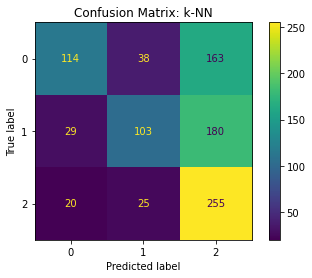

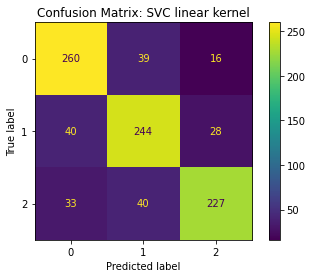

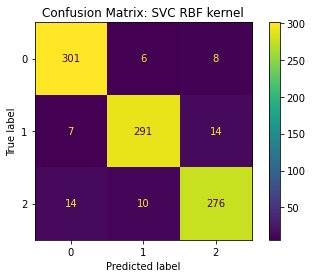

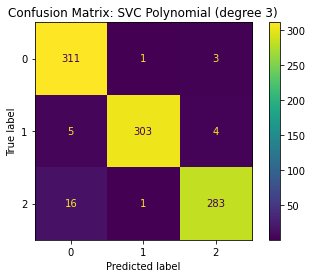

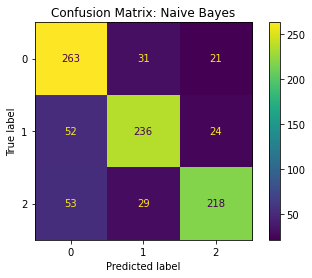

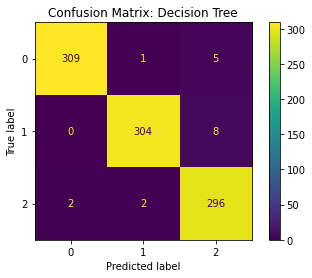

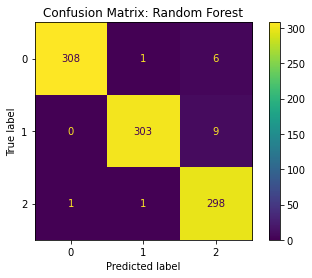

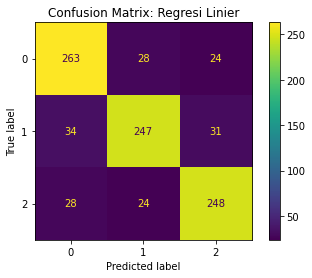

In [43]:
from sklearn.metrics import plot_confusion_matrix

for name, model in models:
  plot_confusion_matrix(model,X_train, y_train) 
  plt.title('Confusion Matrix: {}'.format(name))
  plt.show()

# Laporan Testing

In [36]:
print("[INFO] Laporan klasifikasi\n")
for name, clf in models:
  clf_predict = clf.predict(X_test)
  print('[INFO] Menggunakan {}'.format(name))
  print(classification_report(y_test, clf_predict, target_names=['0', '2']))

[INFO] Laporan klasifikasi

[INFO] Menggunakan k-NN
              precision    recall  f1-score   support

           0       0.54      0.25      0.34        79
           2       0.50      0.78      0.61        77

    accuracy                           0.51       156
   macro avg       0.52      0.52      0.48       156
weighted avg       0.52      0.51      0.48       156

[INFO] Menggunakan SVC linear kernel
              precision    recall  f1-score   support

           0       0.64      0.86      0.74        79
           2       0.78      0.51      0.61        77

    accuracy                           0.69       156
   macro avg       0.71      0.68      0.67       156
weighted avg       0.71      0.69      0.68       156

[INFO] Menggunakan SVC RBF kernel
              precision    recall  f1-score   support

           0       0.69      0.86      0.76        79
           2       0.81      0.60      0.69        77

    accuracy                           0.73       156
   ma

Testing Confusion Matrix

In [37]:
for name, model in models:
  
  plot_confusion_matrix(model, shopee_vector_x_test, y_test) 
  plt.title('Confusion Matrix Test: {}'.format(name))
  
  plt.show()

NameError: name 'plot_confusion_matrix' is not defined